<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [10]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


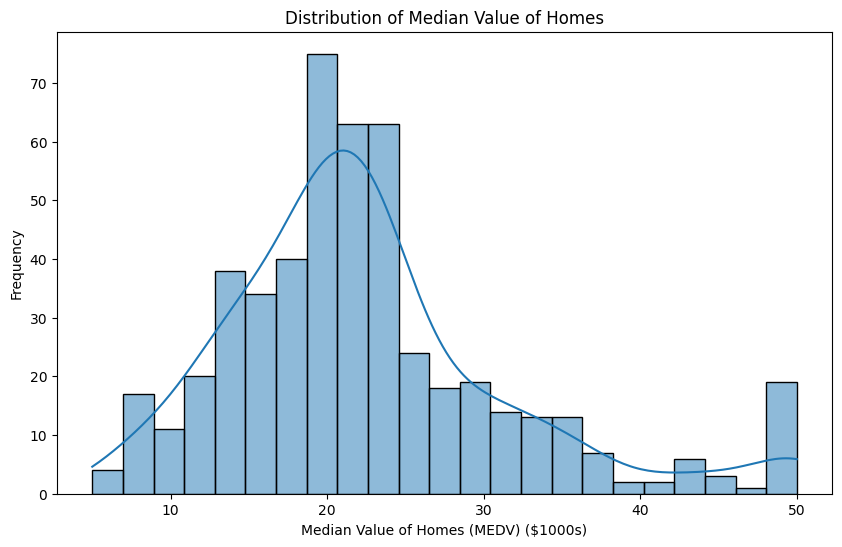

In [11]:
##Histograms for Distribution of House Prices

plt.figure(figsize=(10, 6))
sns.histplot(boston_df['MEDV'], kde=True)
plt.title('Distribution of Median Value of Homes')
plt.xlabel('Median Value of Homes (MEDV) ($1000s)')
plt.ylabel('Frequency')
plt.show()

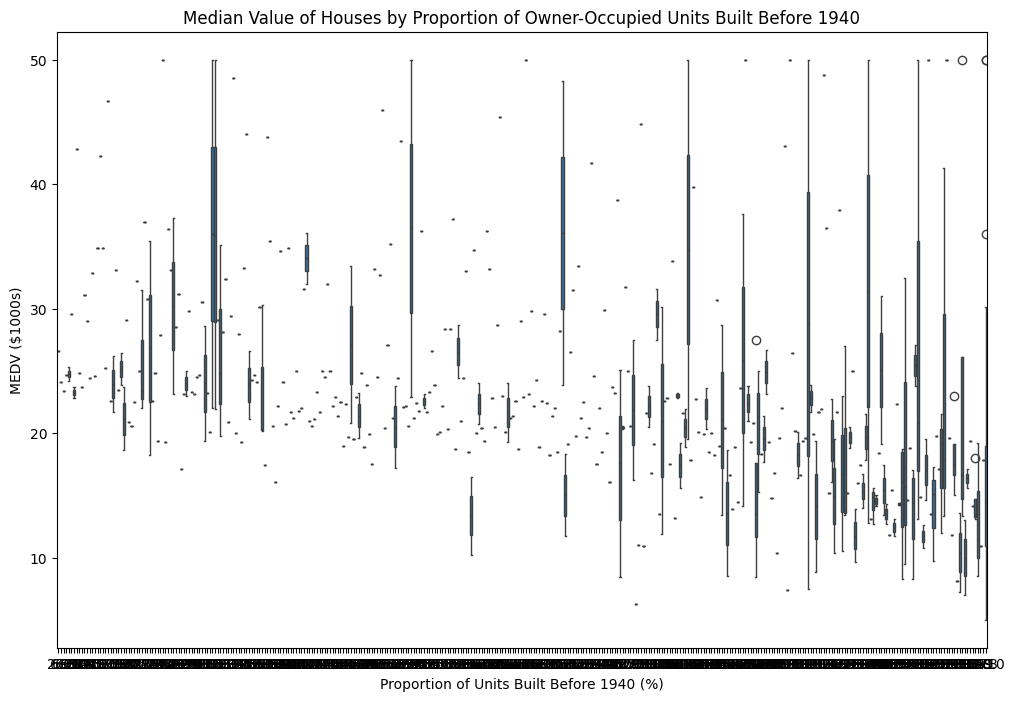

In [12]:
##Box Plot for House Prices by AGE Bins

plt.figure(figsize=(12,8))
sns.boxplot(x='AGE', y='MEDV', data=boston_df)
plt.title('Median Value of Houses by Proportion of Owner-Occupied Units Built Before 1940')
plt.xlabel('Proportion of Units Built Before 1940 (%)')
plt.ylabel('MEDV ($1000s)')
plt.show()


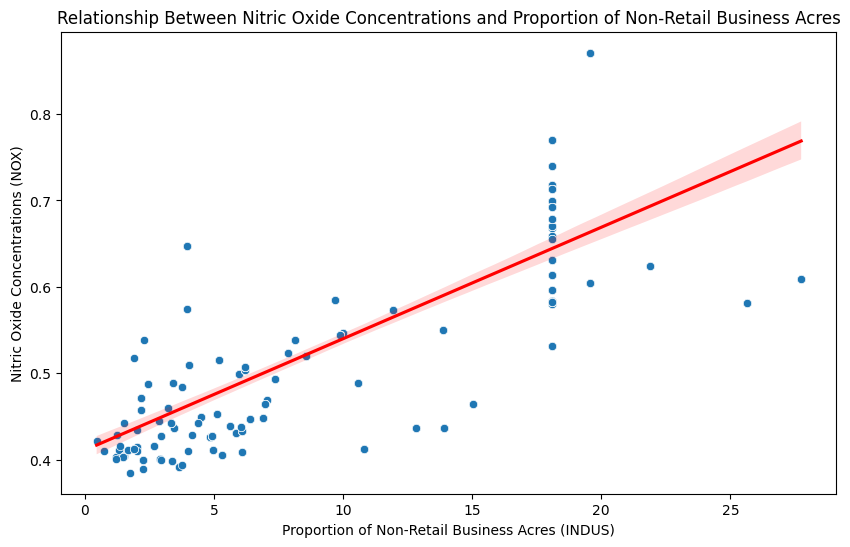

In [13]:
##Scatter Plot for NOX and INDUS


plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
sns.regplot(x='INDUS', y='NOX', data=boston_df, scatter=False, color='red')
plt.title('Relationship Between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.show()

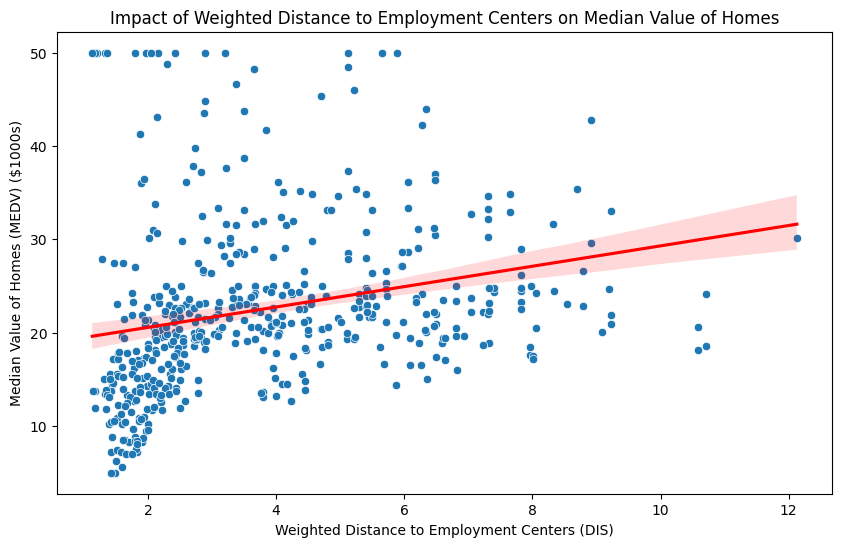

In [14]:
##Scatter Plot for DIS and MEDV


plt.figure(figsize=(10, 6))
sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
sns.regplot(x='DIS', y='MEDV', data=boston_df, scatter=False, color='red')
plt.title('Impact of Weighted Distance to Employment Centers on Median Value of Homes')
plt.xlabel('Weighted Distance to Employment Centers (DIS)')
plt.ylabel('Median Value of Homes (MEDV) ($1000s)')
plt.show()

In [15]:
##1. Significant Difference in the Median Value of Houses Bounded by the Charles River
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

# Split data into two groups: houses bounded by the Charles River (CHAS=1) and not (CHAS=0)
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform a t-test to determine if the difference in median values is statistically significant
t_stat, p_value = ttest_ind(chas_0, chas_1)

# Create box plots to visualize the distribution of house values for each group
plt.figure(figsize=(10, 6))
sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
plt.title('Median Value of Houses Bounded by Charles River (CHAS=1) vs. Not (CHAS=0)')
plt.xlabel('CHAS')
plt.ylabel('MEDV ($1000s)')
plt.show()

print(f'T-statistic: {t_stat}, P-value: {p_value}')

<class 'urllib.error.URLError'>: <urlopen error [Errno 23] Host is unreachable>

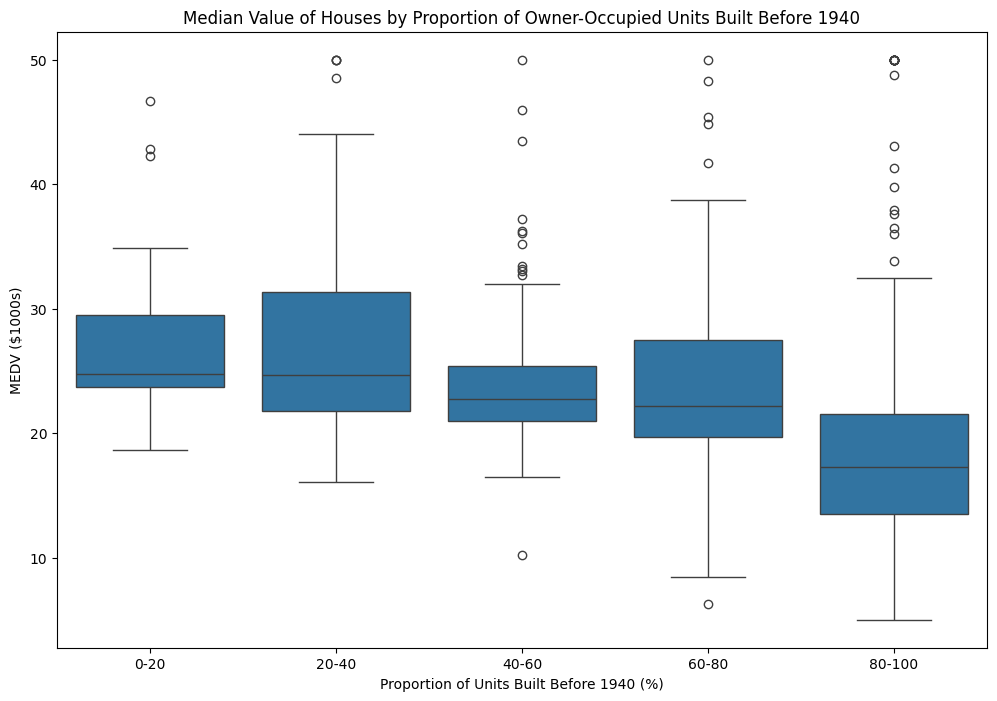

ANOVA Results: F_onewayResult(statistic=20.029107186947982, pvalue=2.5828143681068496e-15)


In [16]:
##2. Difference in Median Values of Houses by Proportion of Owner-Occupied Units Built Before 1940
from scipy.stats import f_oneway

# Bin the AGE column into categories
boston_df['AGE_bin'] = pd.cut(boston_df['AGE'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

# Perform ANOVA to test for differences in median values across AGE bins
anova_results = f_oneway(
    boston_df[boston_df['AGE_bin'] == '0-20']['MEDV'],
    boston_df[boston_df['AGE_bin'] == '20-40']['MEDV'],
    boston_df[boston_df['AGE_bin'] == '40-60']['MEDV'],
    boston_df[boston_df['AGE_bin'] == '60-80']['MEDV'],
    boston_df[boston_df['AGE_bin'] == '80-100']['MEDV']
)

# Create box plots to visualize the distribution of house values across different AGE bins
plt.figure(figsize=(12, 8))
sns.boxplot(x='AGE_bin', y='MEDV', data=boston_df)
plt.title('Median Value of Houses by Proportion of Owner-Occupied Units Built Before 1940')
plt.xlabel('Proportion of Units Built Before 1940 (%)')
plt.ylabel('MEDV ($1000s)')
plt.show()

print(f'ANOVA Results: {anova_results}')


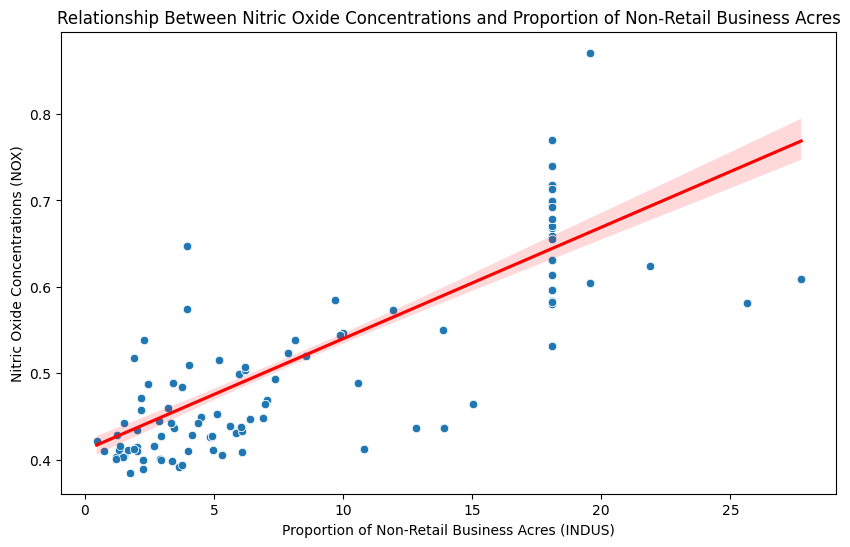

Correlation coefficient between NOX and INDUS: 0.763651446920914


In [17]:
##3. Relationship Between Nitric Oxide Concentrations and the Proportion of Non-Retail Business Acres per Town

# Calculate the correlation coefficient between NOX and INDUS
correlation = boston_df['NOX'].corr(boston_df['INDUS'])

# Create a scatter plot with a regression line to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
sns.regplot(x='INDUS', y='NOX', data=boston_df, scatter=False, color='red')
plt.title('Relationship Between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.show()

print(f'Correlation coefficient between NOX and INDUS: {correlation}')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        18:25:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

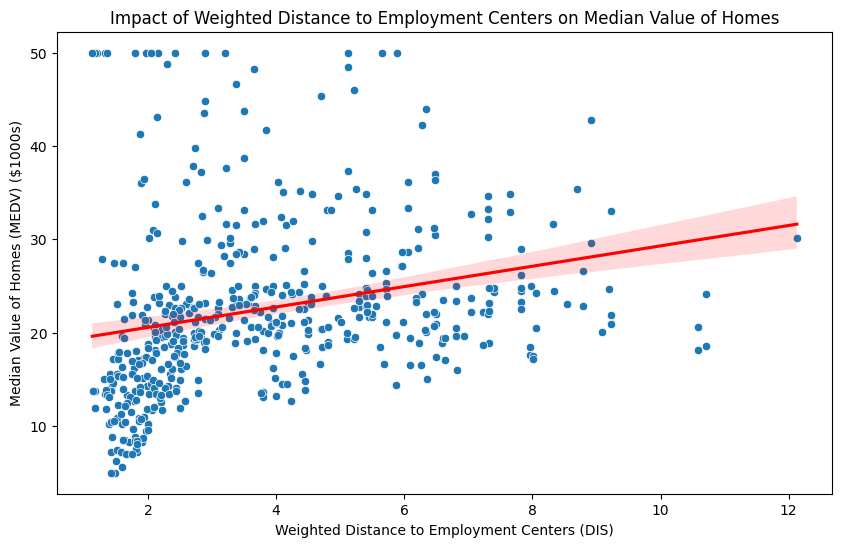

In [18]:
##4. Impact of Weighted Distance to Employment Centers on Median Value of Homes
import statsmodels.api as sm

# Define the dependent and independent variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Create a scatter plot with the regression line to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
sns.regplot(x='DIS', y='MEDV', data=boston_df, scatter=False, color='red')
plt.title('Impact of Weighted Distance to Employment Centers on Median Value of Homes')
plt.xlabel('Weighted Distance to Employment Centers (DIS)')
plt.ylabel('Median Value of Homes (MEDV) ($1000s)')
plt.show()
